In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest


In [2]:
populasyon = np.random.randint(0, 80, 10000)
populasyon.mean()

39.8174

In [3]:
np.random.seed(115)

orneklem = np.random.choice(a=populasyon, size=100)
orneklem.mean()

38.19

In [4]:
np.random.seed(10)
orneklem1 = np.random.choice(a=populasyon, size=100)
orneklem2 = np.random.choice(a=populasyon, size=100)
orneklem3 = np.random.choice(a=populasyon, size=100)
orneklem4 = np.random.choice(a=populasyon, size=100)
orneklem5 = np.random.choice(a=populasyon, size=100)
orneklem6 = np.random.choice(a=populasyon, size=100)
orneklem7 = np.random.choice(a=populasyon, size=100)
orneklem8 = np.random.choice(a=populasyon, size=100)
orneklem9 = np.random.choice(a=populasyon, size=100)
orneklem10 = np.random.choice(a=populasyon, size=100)

(orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean()
 + orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean()) / 10

39.602000000000004

In [5]:
df = sns.load_dataset("tips")
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
#confidence intervals (güven aralıkları)
sms.DescrStatsW(df["total_bill"]).tconfint_mean()

(18.66333170435847, 20.908553541543164)

In [18]:
import numpy as np
from scipy.stats import t

# Örnek verileri oluştur
data = df["total_bill"]



# Örnek ortalamasını hesapla
mean = np.median(data)

# Örnek standart sapmasını hesapla
std = np.std(data)

# Örnek boyutunu hesapla
n = len(data)

# T dağılımının kritik değerini hesapla
t_value = t.ppf(0.95, n-1)

# Güven aralığını hesapla
confidence_interval = (mean - std * t_value / np.sqrt(n), mean + std * t_value / np.sqrt(n))

# Güven aralığını yazdır
print(confidence_interval)

(16.85591023742472, 18.734089762575284)


In [10]:
sms.DescrStatsW(df["tip"]).tconfint_mean()

(2.823799306281821, 3.1727580707673595)

In [103]:
import numpy as np
from scikits.bootstrap import bootstrap 

def median_ci(data, alpha):
    # Bootstrap fonksiyonu, bir istatistik (bu durumda np.median) ve bir veri seti alır.
    # alpha, güven aralığını belirler (örneğin, alpha = 0.05 için %95 güven aralığı)
    # Döndürülen değerler alt ve üst güven sınırlarıdır.
    lower, upper = bootstrap.ci(data, np.median, alpha=alpha)
    return lower, upper

lower, upper = median_ci(df["total_bill"], 0.05)
print(f"Medyan için %95 güven aralığı: ({lower:.2f}, {upper:.2f})")

Medyan için %95 güven aralığı: (16.49, 18.66)


In [104]:
import numpy as np
from scikits.bootstrap import bootstrap 

def median_ci(data, alpha):
    # Bootstrap fonksiyonu, bir istatistik (bu durumda np.median) ve bir veri seti alır.
    # alpha, güven aralığını belirler (örneğin, alpha = 0.05 için %95 güven aralığı)
    # Döndürülen değerler alt ve üst güven sınırlarıdır.
    lower, upper = bootstrap.ci(data, np.median, alpha=alpha)
    return lower, upper

lower, upper = median_ci(df["tip"], 0.05)
print(f"Medyan için %95 güven aralığı: ({lower:.2f}, {upper:.2f})")

Medyan için %95 güven aralığı: (2.50, 3.00)


<Axes: >

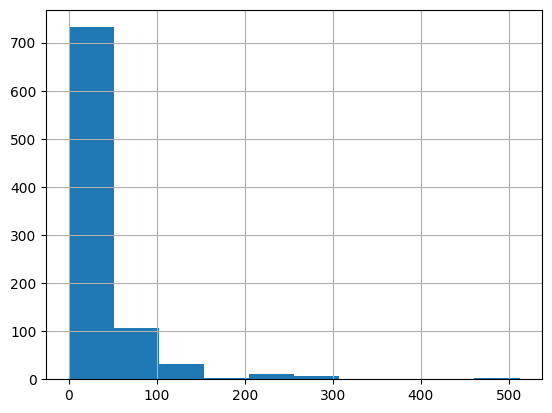

In [86]:
df = sns.load_dataset("titanic")
df["fare"].hist()

In [87]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [88]:
sms.DescrStatsW(df["fare"].dropna()).tconfint_mean()

(28.936831234567325, 35.471584702581936)

In [89]:
df["fare"].mean(), df["fare"].median()

(32.204207968574636, 14.4542)

In [90]:
import numpy as np
from scikits.bootstrap import bootstrap 

def median_ci(data, alpha):
    # Bootstrap fonksiyonu, bir istatistik (bu durumda np.median) ve bir veri seti alır.
    # alpha, güven aralığını belirler (örneğin, alpha = 0.05 için %95 güven aralığı)
    # Döndürülen değerler alt ve üst güven sınırlarıdır.
    lower, upper = bootstrap.ci(data, np.median, alpha=alpha)
    return lower, upper

lower, upper = median_ci(df["fare"].dropna(), 0.05)
print(f"Medyan için %95 güven aralığı: ({lower:.2f}, {upper:.2f})")

Medyan için %95 güven aralığı: (13.00, 15.25)


In [91]:
sms.DescrStatsW(df["age"].dropna()).tconfint_mean()

(28.631790041821507, 30.766445252296133)

In [105]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [106]:
df["total_bill"] = df["total_bill"] - df["tip"]

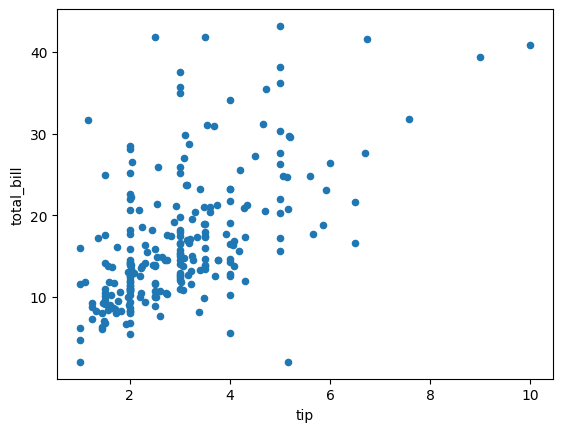

In [107]:
df.plot.scatter("tip","total_bill")
plt.show()

In [108]:
df["tip"].corr(df["total_bill"])

0.5766634471096378